In [2]:
import pandas as pd


In [3]:
#Get the data iris from csv file and save it as dataframe
csv_data = pd.read_csv('iris1.csv')
#print(csv_data)
type(csv_data)

pandas.core.frame.DataFrame

In [16]:
dataF = pd.DataFrame.sample(csv_data,frac=1)

In [1]:
#print(dataF)
#len(dataF)
print(dataF)

NameError: name 'dataF' is not defined

In [18]:
Species = dataF['Species'].values[:]

In [19]:
#Species

In [20]:
def mapping(x):
    if(x == 'Iris-virginica'):
        return 1
    else:
        return 0

Species1 = list(map(mapping, Species)) 
#print(Species1) 

In [21]:
#Sapel = dataF.values[:][:]
#Sapel
Sapel = dataF.loc[:,['Sapel_length','Sapel_width']] #df.loc[row_indexer,column_indexer]
#Sapel
Sapel['bias'] = [1.0]*len(Sapel)
#bias = pd.DataFrame({'bias': [1.0]*len(Sapel)})
#Sapel.append(bias,sort=False)
#Sapel

In [22]:
sampleLength = len(Sapel)*0.7 #70% of iris data is train

trainSapel = Sapel[0:int(sampleLength)]
trainSpecies = Species1[0:int(sampleLength)]
trainSpecies
len(trainSpecies)
#train = Sapel.head(int(trainingNum))
#train
#len(train)

105

In [23]:
testSapel = Sapel[int(sampleLength):]
testSpecies = Species1[int(sampleLength):]
testSpecies
len(testSpecies)
#test
#len(test)

45

In [24]:
import numpy as np

# importing the required module 
import matplotlib.pyplot as plt 

In [25]:
def sig(x,theta):

    y = np.dot(theta,x.transpose())
    sigmoid = 1/(1+np.exp(-y))
    
    return sigmoid
    

In [26]:
def gradient(x,t,theta): #formula = x(transpose) [t-sigmoid(x,theta)]
#x = trainSapel
#t = trainSpecies
#theta = [0,0,0]
    sigmoid = (sig(x,theta))

    #l = np.array(t) - sigmoid #.transpose()?
    l = -np.array(t) + sigmoid 
    grad = np.dot(x.transpose(),l)
    return grad

In [27]:
def sgd_linear_regression(theta,learningRate,grad):
    #new_theta = theta + learningRate*grad
    new_theta = np.subtract(theta,np.multiply(learningRate,grad))
    #new_theta = np.add(theta,np.multiply(learningRate,grad))
    return new_theta

In [28]:
def log_likelihood(data_train,target_train,theta):
    m = data_train.shape[0]
    
    l1=np.dot(target_train,np.log(sig(data_train,theta)))
    
    sub1 = np.subtract(1,target_train)
    sub3 = np.subtract(1,sig(data_train,theta))
    
    try:
        sub2 = np.log(sub3)
        l2 = np.dot(sub1,sub2)
        ll=np.add(l1,l2)
        
        return np.dot((-1/m),ll)
    
    except e:
        print("exp")
    

In [29]:
def prediction(testSapel,theta):
    #x = testSapel   
    sigmoid = sig(testSapel,theta)
    predict = []
    #theta = [5.93867065,-11.26247033,-9.54471196]
    #theta = [83.31296819,-36.8153267,-471.88521072]
    for eachx in range(0,len(testSapel)):
        if(sigmoid[eachx]>0.5):
            predict.append(1)
        
        else:
            predict.append(0)
            
    return predict
        
#print(prediction)
#print(testSpecies)

In [30]:
x = trainSapel
t = trainSpecies
theta = [0,0,0]
sigmoid = sig(x,theta)
learningRate = 0.003
#learningRate = 0.05
looping = 5000
likelihood = []
loop = []
for i in range(0,looping):
    grad = gradient(x,t,theta)
    theta = sgd_linear_regression(theta,learningRate,grad)
    loop.append(i)
    likelihood.append(log_likelihood(trainSapel,trainSpecies,theta))
    #print(grad,theta)
    #print(theta)
#plt.plot()
sigmoid = min(sig(x,theta))
#print(sigmoid)
#predict = prediction(testSapel,theta)
predict = prediction(Sapel,theta)
#print(theta)
#print(predict)
#print(testSpecies)

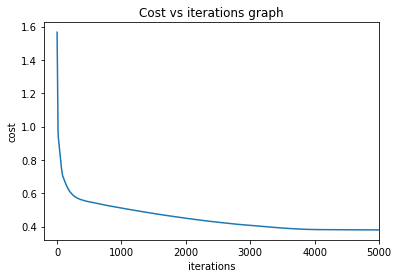

In [31]:
#print(len(likelihood))
#print(len(loop))
#print(np.sort(likelihood))
y = np.sort(likelihood)
r = y[::-1]
plt.plot(loop,r)
#it = len(likelihood)

#print(it)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.title('Cost vs iterations graph')

plt.xlim(-200,len(loop))
plt.show()

In [32]:
#x.transpose()
#grad

In [33]:
#Uncomment to get accuracy using sklearn
#from sklearn.metrics import accuracy_score

#accuracy = accuracy_score(Species1,predict)
#print(accuracy)

#print(Species1,predict)
#calculate acc manually
false = 0
for i in range(0,len(Species1)):
    if(Species1[i] != predict[i]):
        
        false+=1
          
accuracy1 =(len(Species1) - false)/len(Species1)
print("accuracy: " + str(accuracy1))
error = 1 - accuracy1
print("error: " + str(error))

accuracy: 0.7866666666666666
error: 0.21333333333333337


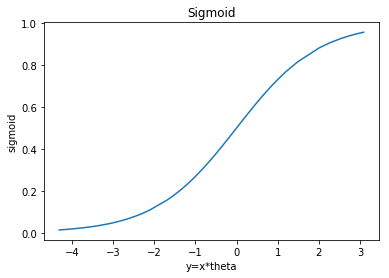

In [34]:
#x = np.sort(x)
y = np.sort(np.dot(theta,x.transpose()))
#print(theta)

def sigm(y):
    #y = np.dot(theta,x.transpose())
    #for i in range(0,len(y)):
    sigmoid = 1/(1+np.exp(-y))
    return sigmoid
  

sigmoid = []
for i in range(0,len(y)):
    sigmoid.append(sigm(y[i]))
    
#print(min(sigmoid))
#print(y,sigmoid)

plt.plot(y,sigmoid)
plt.xlabel('y=x*theta')
plt.ylabel('sigmoid')

plt.title('Sigmoid')

plt.show()



In [35]:
#Species

50 100


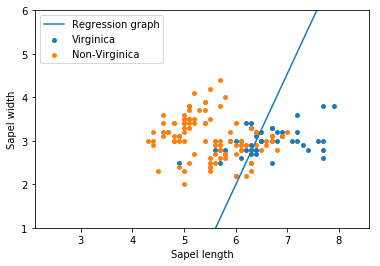

In [36]:
#scatter plot-
#print(dataF)
x = Sapel.iloc[:,:-1]
#print(x)
#print(type(x))
#y = Species1


y = dataF.iloc[:,-1]
#y = pd.DataFrame(Species1).iloc[:,0]
#print(y)


#dataF[:,-1] = list(map(mapping, y))
#print(y_f) 

virginica = x.loc[y == "Iris-virginica"]
non_virginica = x.loc[y != "Iris-virginica"]
print(len(virginica),len(non_virginica))

plt.scatter(virginica.iloc[:,0], virginica.iloc[:,1],s=15,label='Virginica')
plt.scatter(non_virginica.iloc[:,0], non_virginica.iloc[:,1],s=15,label='Non-Virginica')
plt.legend()
#plt.show()
#y = Sapel.iloc[]
#len(Sapel)
#Sapel

x_val = [np.min(x.iloc[:,0]+4),np.max(x.iloc[:,1]-2)]
y_val = -(theta[2] + np.dot(theta[0], x_val))/theta[1]
plt.plot(x_val, y_val, label = "Regression graph")
plt.xlabel('Sapel length')
plt.ylim(1,6)
plt.ylabel('Sapel width')
plt.legend()
plt.show()
